In [1]:
#Load up all the common functions. Required to execute other experiments
#Please reload if changes are made to the functions
%run Common.ipynb

2023-08-01 09:33:48.470163: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
x_train,x_test,y_train,y_test = get_data("AAPL","2010-01-01")

[*********************100%***********************]  1 of 1 completed
(2724, 10, 2) (682, 10, 2) (2724, 2) (682, 2)


## 4.3. Regularization

In [3]:
accuracy_measures = {}

regularizer_list = ['l1','l2','l1_l2']
for regularizer in regularizer_list:
    
    model_config = base_model_config()
    #X,Y = get_data()
    
    model_config["REGULARIZER"] = regularizer
    model_config["EPOCHS"]=25
    model_name = "Regularizer-" + regularizer
    #history=create_and_run_model(model_config,X,Y, model_name)
    history = create_and_run_model(model_config,x_train,y_train,model_name,x_test,x_train)

    #Switch to validation accuracy
    accuracy_measures[model_name] = history.history["val_accuracy"]




******************************************************
Model: "Regularizer-l1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                672       
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 2)                 130       
                                                                 
Total params: 3042 (11.88 KB)
Trainable params: 2978 (11.63 KB)
Non-trainable params: 64 (256.00 Byte)
_________________________________________________________________

************************

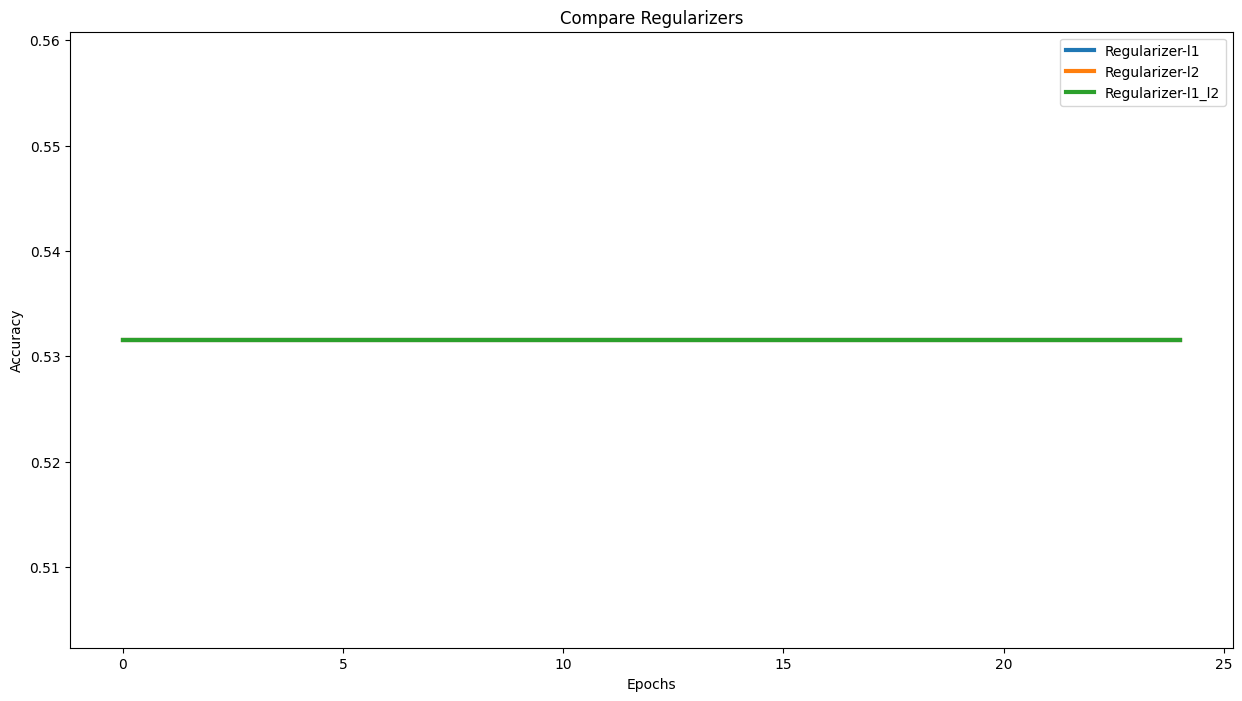

In [4]:
plot_graph(accuracy_measures, "Compare Regularizers")

## 4.5. Dropout

In [5]:
accuracy_measures = {}

dropout_list = [0.0, 0.1, 0.2, 0.5]
for dropout in dropout_list:
    
    model_config = base_model_config()
    #X,Y = get_data()
    
    model_config["DROPOUT_RATE"] = dropout
    model_config["EPOCHS"]=25
    model_name="Dropout-" + str(dropout)
    #history=create_and_run_model(model_config,X,Y, model_name)
    history = create_and_run_model(model_config,x_train,y_train,model_name,x_test,x_train)

    #Using validation accuracy
    accuracy_measures[model_name] = history.history["val_accuracy"]



******************************************************
Model: "Dropout-0.0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                672       
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 Dense-Layer-1 (Dense)       (None, 64)                2112      
                                                                 
 Output-Layer (Dense)        (None, 2)                 130       
                                                                 
Total params: 3042 (11.88 KB)
Trainable params: 2978 (11.63 KB)
Non-trainable params: 64 (256.00 Byte)
_________________________________________________________________

***************************

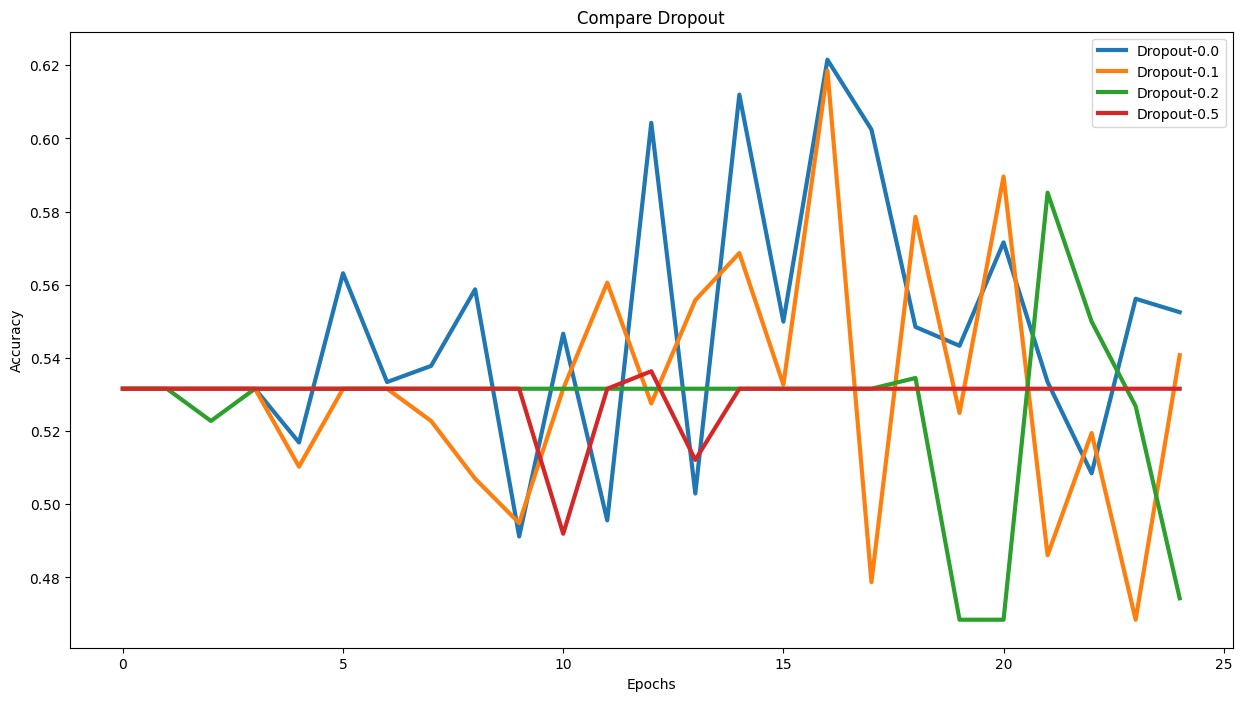

In [6]:
plot_graph(accuracy_measures, "Compare Dropout")